# Analiza podatkov

* Tukaj bomo analizirali podatke, shranjene v datoteko godot.csv
* Za rezultate zaženemo posamične bloke kode.
* Nekateri bloki kode ne bodo delovali, če ne zaženemo prejšnjih. Najbolj pomemben je prvi blok, kjer podatke shranimo v tabelo.
* Če vam program pravi, da nimate potrebnih knižnjic jih morate naložiti z pip install
> Če se vam to zdi prezahtevno, vam programov ni treba zaganjati, lahko si samo pogledate že pridobljene rezultate.

Najprej moramo naložiti knižnjice in podatke iz datoteke godot.csv shraniti v lepo obliko. Hkrati bomo tudi odstranili manjkajoče in podvojene podatke.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


podatki = pd.read_csv("godot.csv",on_bad_lines="skip",delimiter=";")
podatki = podatki.dropna().convert_dtypes({"id":int}).drop_duplicates(keep="first")
podatki

,id,ime,link,tip_aplikacije,cena,znižanje,datum_izdaje,izdajatelj,založnik,ocene,žanri,št_dosežkov,opis
0,1942280,Brotato,https://store.steampowered.com/app/1942280/Bro...,Game,"4,99€",No discount,"23 Jun, 2023",Blobfish,Blobfish,"('Overwhelmingly Positive', '74,411', '97%')","('Action', 'Casual', 'Indie', 'RPG')",83,Brotato is a top-down arena shooter roguelite ...
1,1677770,The Case of the Golden Idol,https://store.steampowered.com/app/1677770/The...,Game,"17,99€",No discount,"13 Oct, 2022",Color Gray Games,Playstack,"('Overwhelmingly Positive', '6,115', '98%')","('Adventure', 'Indie')",17,A new kind of detective game that allows you t...
2,2570630,20 Small Mazes,https://store.steampowered.com/app/2570630/20_...,Game,Free,No discount,"16 Feb, 2024",FLEB,FLEB,"('Overwhelmingly Positive', '5,280', '98%')","('Adventure', 'Casual', 'Indie')",1,This is a puzzle game with twenty small mazes....
3,1713610,Purrgatory,https://store.steampowered.com/app/1713610/Pur...,Game,Free,No discount,"22 Aug, 2021",Niv (Darvin Heo),Niv (Darvin Heo),"('Overwhelmingly Positive', '4,115', '99%')","('Adventure', 'Casual', 'Free To Play', 'Indie')",No achievements,A slice-of-death visual novel about making fri...
4,1507970,Word Game: Episode 0,https://store.steampowered.com/app/1507970/Wor...,Game,Free,No discount,"14 Jan, 2021",Team9,Team9,"('Overwhelmingly Positive', '4,514', '98%')","('Adventure', 'Indie', 'RPG', 'Strategy')",No achievements,Word game is literally a game of words. Player...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,3091200,Cricket Legends,https://store.steampowered.com/app/3091200/Cri...,Game,"10,79€",No discount,"28 Jul, 2024",Ravi Gyani,Ravi Gyani,No reviews,"('Simulation', 'Sports', 'Early Access')",No achievements,"Simple to play, but Difficult to master authen..."
2377,3084100,Depth Ascend,https://store.steampowered.com/app/3084100/Dep...,Game,Free,No discount,Coming soon,Julián Ochando,Julian Ochando,No reviews,"('Action', 'Casual', 'Indie', 'Racing')",No achievements,"Embark on an epic race for your survival, feed..."
2378,3060400,ShipOS 1994,https://store.steampowered.com/app/3060400/Shi...,Game,Free,No discount,"28 Oct, 2024",Border Collie Games,Border Collie Games,No reviews,"('Casual', 'Indie', 'Simulation', 'Strategy')",No achievements,Are you ready to recover your family's fortune...
2379,2929730,Cat Bait,https://store.steampowered.com/app/2929730/Cat...,Game,Free,No discount,"25 Aug, 2024",Mayni prod.,Mayni prod.,No reviews,"('Action', 'Casual', 'Indie')",No achievements,Cat Bait is a casual game with cute pixel grap...


Ker hočemo prihraniti denar, si poglejmo, katere igre imajo trenutno znižano ceno.

In [6]:
on_sale = podatki[podatki["znižanje"]!="No discount"]
on_sale[["ime","cena","znižanje"]]

,ime,cena,znižanje
5,A Building Full of Cats,"1,95€","('20%', '1,56€')"
12,Sudocats,"1,95€","('30%', '1,36€')"
14,Path of Achra,"9,75€","('25%', '7,31€')"
16,Zodiacats,"1,95€","('30%', '1,36€')"
42,Ex-Zodiac,"8,99€","('45%', '4,94€')"
55,Backpack Battles,"12,99€","('10%', '11,69€')"
70,Canvas of Kings,"18,49€","('20%', '14,79€')"
110,Seedlings,"8,19€","('40%', '4,91€')"
127,Chess Survivors,"4,99€","('50%', '2,49€')"
147,Takara Cards,"14,79€","('20%', '11,83€')"


Nekatere igre pa so celo zastonj! Poglejmo si še te.

In [7]:
zastonj = podatki[podatki["cena"]=="Free"]
zastonj[["ime"]]

,ime
2,20 Small Mazes
3,Purrgatory
4,Word Game: Episode 0
6,Virtual Cottage
9,Psychopomp
...,...
2373,Supurr Cat Cafe: Sandwich Rush
2377,Depth Ascend
2378,ShipOS 1994
2379,Cat Bait


Godot je pravzaprav precej "mlad", javno dostopen je šele od leta 2014. Poglejmo si, koliko iger je bilo izdanih na leto.

Nekaj komentarjev:
* Datumi izdaj vsebujejo tudi napovedane datume iger, ki še niso bile izdane. Zato so nekatere igre "iz prihodnosti". Ups!
* Igra Evochron Mercenary je bila izdana leta 2012, pred javnim dostopom Godota. SteamDB, kjer smo dobili seznam godot iger, ga ponesreči uvršča med Godot igre. Če vas zanima več: https://github.com/SteamDatabase/FileDetectionRuleSets/issues/30

<Axes: xlabel='Leto izdaje'>

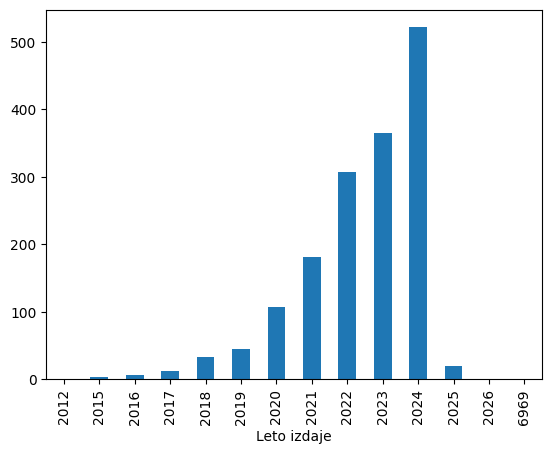

In [10]:
def leto(niz):
    try:
        return int(niz[-4:])
    except:
        return 0

datumi = podatki.copy()
datumi["datum_izdaje"] = datumi["datum_izdaje"].apply(leto)
datumi = datumi[datumi["datum_izdaje"] != 0]
datumi.groupby("datum_izdaje").size().plot.bar(xlabel="Leto izdaje")


Različne igre imajo različne žanre. Poglejmo si, kateri so najbolj pogosti.

{'Action': 770, 'Casual': 808, 'Indie': 1352, 'RPG': 271, 'Adventure': 557, 'Free To Play': 165, 'Strategy': 392, 'Simulation': 255, 'Early Access': 204, 'Animation & Modeling': 5, 'Design & Illustration': 10, 'Game Development': 8, 'Massively Multiplayer': 20, 'Racing': 54, 'Utilities': 9, 'Software Training': 1, 'Sports': 49, 'Education': 2, 'Video Production': 1, '': 2, 'Photo Editing': 1}


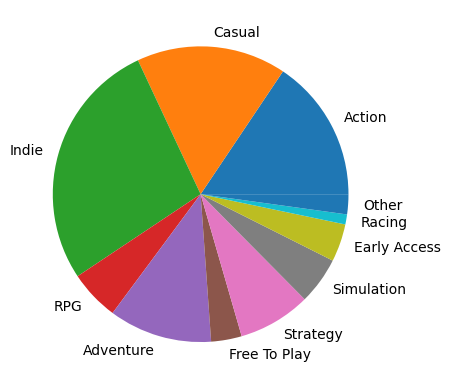

In [76]:
slovar = {}
def dodaj_v_slovar(seznam,slovar):
    for skoraj_zanr in seznam[1:-1].split(", "):
        zanr = skoraj_zanr.replace("'","").replace(",","")
        if zanr in slovar:
            slovar[zanr] += 1
        else:
            slovar[zanr] = 1

podatki["genre"].apply(lambda x: dodaj_v_slovar(x,slovar))
print(slovar)
Other = 0
odstrani = []
for key,item in slovar.items():
    if item < 50:
        Other += item
        odstrani.append(key)
for i in odstrani:
    del slovar[i]
slovar["Other"] = Other

plt.pie(slovar.values(), labels=slovar.keys())
plt.show()

Čeprav so na Steam večinoma objavljene igre, obstajajo tudi druge vrste aplikacij.

In [14]:
ne_igre = podatki[podatki["tip_aplikacije"] != "Game"]
ne_igre[["ime","tip_aplikacije"]]

,ime,tip_aplikacije
80,RPG in a Box,Software
137,PNGTuber Plus,Software
148,Tree It,Software
222,PixelOver,Software
430,Kinetic Anatomy 3D,Software
564,BlastFX,Software
614,Cauldron Caution Demo,Demo
615,Block Shop Demo,Demo
629,MOR...E TRAINER (Learning Morse Code),Software
673,Oblin Party Demo,Demo


Večina založnikov je do sedaj izdalo samo eno ali dve igri, nekateri pa so jih izdali že kar precej. Na grafu so založniki, ki so izdali 5 ali več iger.

<Axes: xlabel='Založniki'>

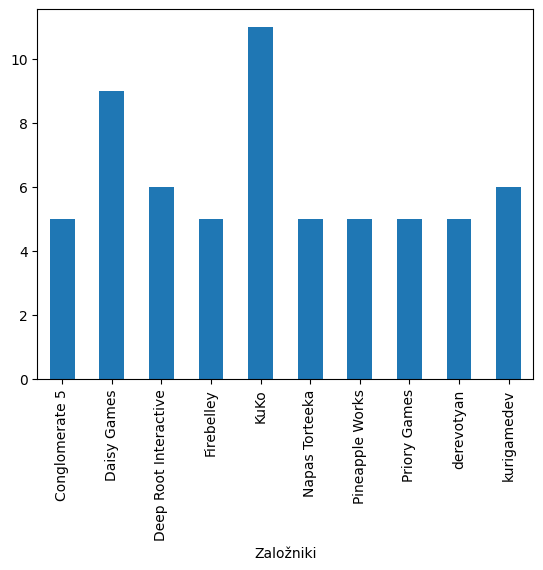

In [16]:
izdatelji = podatki.groupby("založnik").size()
izdatelji[izdatelji >= 5].plot.bar(xlabel="Založniki")

Na Steamu lahko igralci sporočijo, če jim je bila igra všeč ali ne. Na spodnjem grafu so ocene iger.

<Axes: >

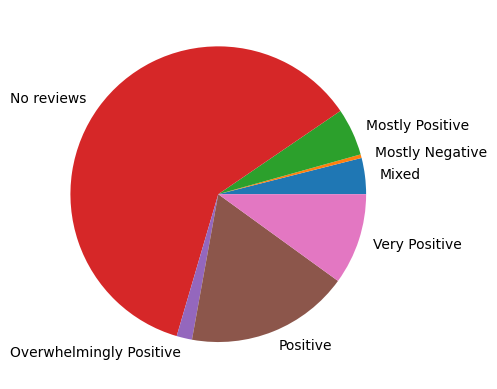

In [79]:
def rating(niz):
    seznam = niz.split("'")
    try:
        return seznam[1]
    except:
        return seznam[0]

ocene = podatki.copy()
ocene["all_reviews"] = ocene["all_reviews"].apply(rating)
ocene.groupby("all_reviews").size().plot.pie()


Zgleda, da večina iger sploh še ni bila ocenjenih! Da bo graf lepši, bomo odstranili neocenjene igre iz grafa.

<Axes: >

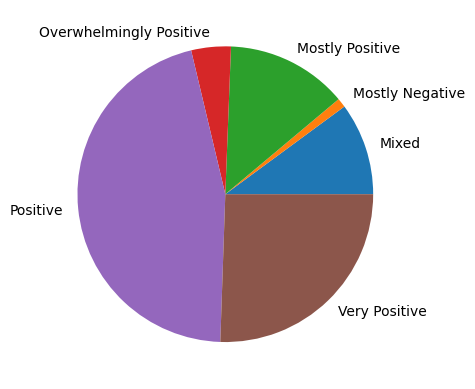

In [80]:
ocene = ocene[ocene["all_reviews"] != "No reviews"]
ocene.groupby("all_reviews").size().plot.pie()

"Overwhelmingly Positive" je najboljša možna ocena. Poglejmo si, katere igre so to.

In [86]:
ocene[ocene["all_reviews"] == "Overwhelmingly Positive"][["ime","genre"]]

,ime,genre
0,Brotato,"('Action', 'Casual', 'Indie', 'RPG')"
1,The Case of the Golden Idol,"('Adventure', 'Indie')"
2,20 Small Mazes,"('Adventure', 'Casual', 'Indie')"
3,Purrgatory,"('Adventure', 'Casual', 'Free To Play', 'Indie')"
4,Word Game: Episode 0,"('Adventure', 'Indie', 'RPG', 'Strategy')"
5,A Building Full of Cats,"('Casual',)"
6,Virtual Cottage,"('Casual', 'Indie', 'Simulation', 'Free To Play')"
7,Cruelty Squad,"('Action', 'Indie', 'Simulation')"
8,Your Only Move Is HUSTLE,"('Action', 'Indie', 'Simulation', 'Strategy')"
9,Psychopomp,"('Adventure', 'Indie', 'Free To Play')"


Če poznate kakšno igro narejeno v Godotu, jo tukaj lahko poiščete. Program deluje le, če natančno napišeš ime.

In [17]:
igra = input("Poišči igro: ")
podatki[podatki["ime"] == igra]

,id,ime,link,tip_aplikacije,cena,znižanje,datum_izdaje,izdajatelj,založnik,ocene,žanri,št_dosežkov,opis
39,1637320,Dome Keeper,https://store.steampowered.com/app/1637320/Dom...,Game,"17,99€",No discount,"27 Sep, 2022",Bippinbits,Raw Fury,"('Very Positive', '11,068', '91%')","('Action', 'Adventure', 'Indie', 'Simulation')",47,Defend against waves of alien attackers in thi...
